In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_excel('precos_porto_seguro.xlsx')

In [4]:
df.head()

,marca,marca_ID,modelo,modelo_descricao,categoria,categoria_ID,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km
0,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,24000,12000,3119,0.259917
1,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,36000,18000,3189,0.177167
2,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,48000,24000,3269,0.136208
3,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,60000,30000,3359,0.111967
4,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,1.5,18000,12000,3219,0.268250


In [5]:
df = df.drop(['modelo', 'modelo_descricao', 'categoria_ID','marca_ID'], axis=1)

In [6]:
df.head()

,marca,categoria,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km
0,VW,sedan,2.0,24000,12000,3119,0.259917
1,VW,sedan,2.0,36000,18000,3189,0.177167
2,VW,sedan,2.0,48000,24000,3269,0.136208
3,VW,sedan,2.0,60000,30000,3359,0.111967
4,VW,sedan,1.5,18000,12000,3219,0.268250


In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km,marca_CAOA-CHERY,marca_CHEVROLET,marca_HYUNDAI,marca_JEEP,marca_NISSAN,marca_RENAULT,marca_TOYOTA,marca_VW,categoria_compacto,categoria_premium,categoria_sedan,categoria_suv
0,2.0,24000,12000,3119,0.259917,0,0,0,0,0,0,0,1,0,0,1,0
1,2.0,36000,18000,3189,0.177167,0,0,0,0,0,0,0,1,0,0,1,0
2,2.0,48000,24000,3269,0.136208,0,0,0,0,0,0,0,1,0,0,1,0
3,2.0,60000,30000,3359,0.111967,0,0,0,0,0,0,0,1,0,0,1,0
4,1.5,18000,12000,3219,0.268250,0,0,0,0,0,0,0,1,0,0,1,0


In [9]:
dmarca = df.loc[:,'preco_km':'marca_VW']

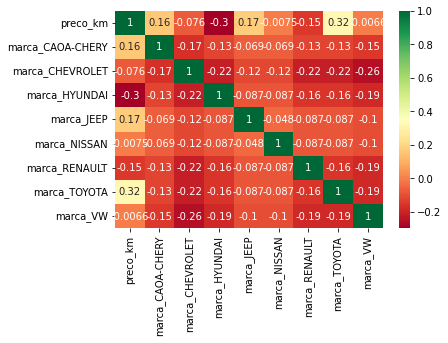

In [10]:
ax = sns.heatmap(dmarca.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='preco_km', ylabel='marca_CHEVROLET'>

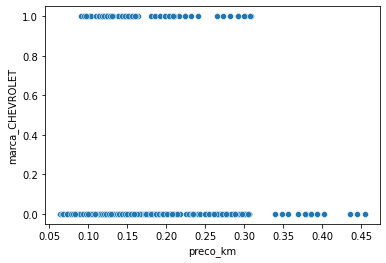

In [15]:
sns.scatterplot(data=dmarca, x='preco_km', y='marca_CHEVROLET')

In [20]:
dcategoria = df.loc[:,['preco_km','categoria_compacto','categoria_premium','categoria_sedan']]

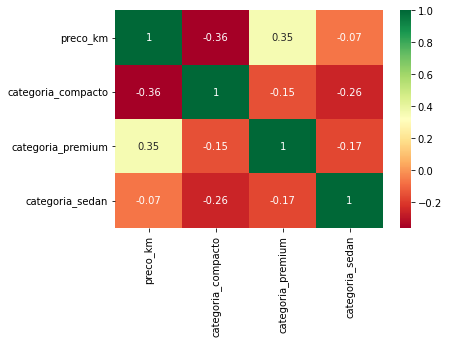

In [21]:
ax = sns.heatmap(dcategoria.corr(),annot=True,cmap='RdYlGn')

In [23]:
dtempo = df.loc[:,['periodo_contrato_anos','km_por_ano','preco_km']]

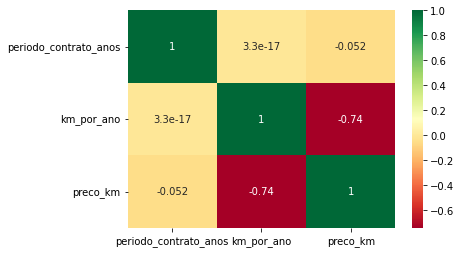

In [24]:
ax = sns.heatmap(dtempo.corr(),annot=True,cmap='RdYlGn')

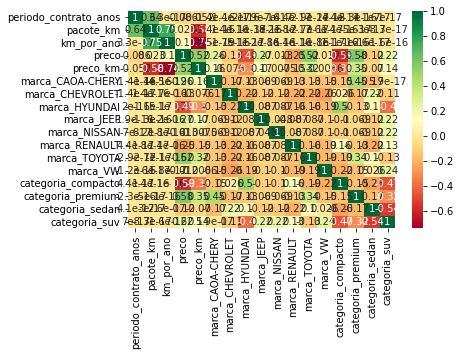

In [17]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

c:\Users\rozam\Documents\ABLA\projetos\predicao_preco_locacao\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco', ylabel='Density'>

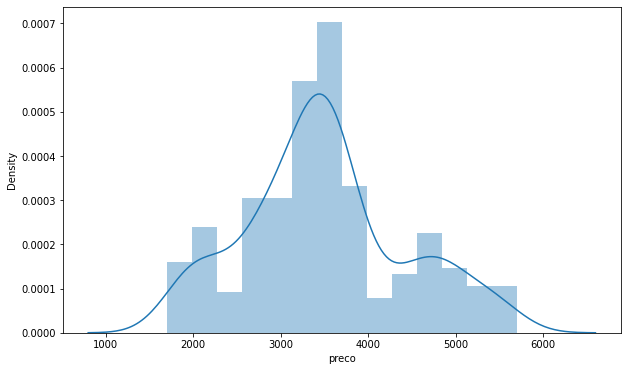

In [27]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['preco'])

c:\Users\rozam\Documents\ABLA\projetos\predicao_preco_locacao\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco_km', ylabel='Density'>

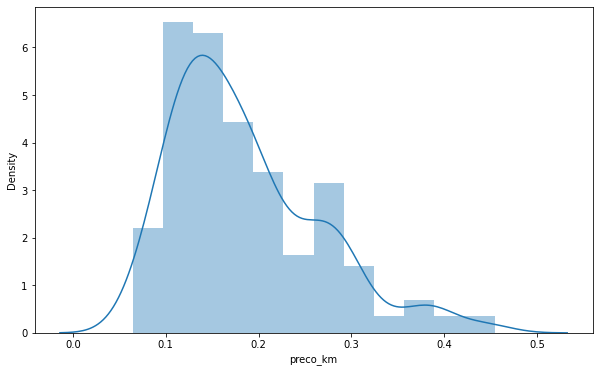

In [34]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['preco_km'])

In [22]:
X = pd.get_dummies(df.drop('preco',axis=1),drop_first=True)
y = df['preco']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

____

Rent a car

In [4]:
rent = pd.read_excel('precos_porto_seguro.xlsx', sheet_name='rent_cars')

In [5]:
rent.head()

,uf,municipio,veiculo,categoria,tipo,local_retirada,qtdd_passageiros,ar_condicionado,cambio,portas,mala,motor,km_ilimitado,km_periodo,km_periodo_valor,km_dia,km_dia_valor,preco,locadora
0,MG,BH,VW Up! ou similar,Econômico,A,Serviço de Shuttle,5.0,0.0,manual,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2233.52,foco
1,MG,BH,Fiat Mobi ou similar,Econômico,B,Serviço de Shuttle,5.0,1.0,manual,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2299.11,foco
2,MG,BH,Renault Kwid ou similar,Econômico,AM,Balcão de Atendimento no Aeroporto,5.0,1.0,manual,4.0,1.0,1.0,0.0,1.0,4500.0,0.0,0.0,2301.60,unidas
3,MG,BH,VW Gol ou similar,Econômico,D,Serviço de Shuttle,5.0,1.0,manual,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2326.83,foco
4,MG,BH,Chevrolet Onix ou similar,Econômico,D+,Serviço de Shuttle,5.0,1.0,manual,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2354.55,foco


c:\Users\ABLA 06\Downloads\predicao_custo_locacao-main\predicao_preco_locacao\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco', ylabel='Density'>

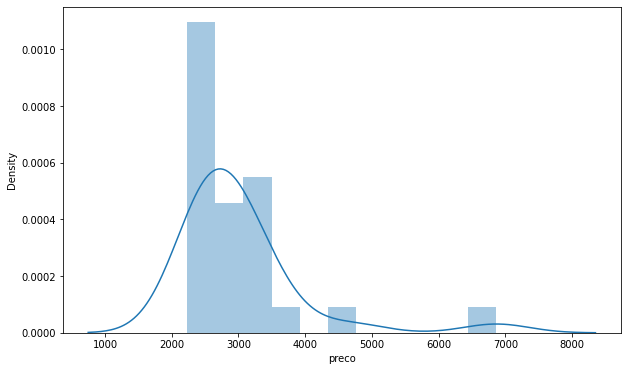

In [6]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(rent['preco'])

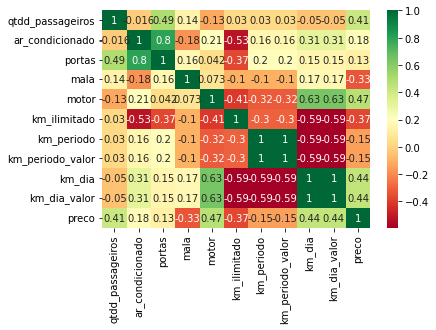

In [7]:
ax = sns.heatmap(rent.corr(),annot=True,cmap='RdYlGn')

In [8]:
rent = pd.get_dummies(rent)

In [10]:
rent.head(2)

,qtdd_passageiros,ar_condicionado,portas,mala,motor,km_ilimitado,km_periodo,km_periodo_valor,km_dia,km_dia_valor,...,tipo_ HY,tipo_ KX,tipo_ L,local_retirada_Balcão de Atendimento no Aeroporto,local_retirada_Serviço de Shuttle,cambio_automatico,cambio_manual,locadora_foco,locadora_movida,locadora_unidas
0,5.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
1,5.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0


In [15]:
rmarca  = rent.loc[:,['qtdd_passageiros','ar_condicionado','portas','mala',	'motor','km_ilimitado','cambio_automatico','uf_MG', 'uf_SP','preco']]

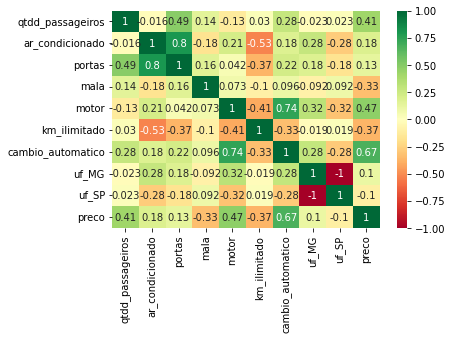

In [16]:
ax = sns.heatmap(rmarca.corr(),annot=True,cmap='RdYlGn')

Conforme os resultados do gráfico acima:
- Os itens que mais tem se correlacionado com o preço do aluguel do veículo é a quantidade de assentos, motor do carro, e presença de cambio automatico. 

**Cambio**, existe preferências com relação à essa escolha no setor de locação?

Segundo as pesquisas:

**Vantagens do câmbio manual**
- Manutenção mais barata: o câmbio manual tem uma manutenção muito mais barata do que o automático, automatizado ou CVT. Por isso, gera custos mensais menores;

- Mais eficiência: um carro com câmbio manual pode ter um consumo de combustível até 10% menor do que o mesmo modelo com câmbio automático. Falaremos com mais detalhes sobre isso a seguir;

- Mais barato no geral: o câmbio manual é mais barato de produzir, o que faz com que o carro fique geralmente um pouco menos caro;

**Desvantagens do câmbio automático**
- Manutenção mais cara: por ser mais complexo, o câmbio automático tem também uma manutenção mais cara do que o manual. Além disso, exige troca periódica de algumas peças, como o óleo e o filtro;

- Maior gasto com combustível: o sistema automático demora um pouco mais para trocar as marchas, o que gera maior consumo de combustível;

- Mais caro: o sistema automático é mais caro para ser produzido. Por causa disso, ele também faz com que o valor do automóvel seja maior.


Fonte: https://www.bv.com.br/bv-inspira/financiamento-de-veiculos/carro-automatico-ou-manual#:~:text=%2DManuten%C3%A7%C3%A3o%20mais%20barata%3A%20o%20c%C3%A2mbio,mesmo%20modelo%20com%20c%C3%A2mbio%20autom%C3%A1tico. 


Quais são as diferenças da potência de um motor veicular?

**Motor 1.0**: 
- carro no dia a dia
- carro econômico
- melhor custo-benefício
- meio de locomoção urbano

**Motor 1.4**:
- motoristas de aplicativos
- rodar longas distâncias diariamente
- melhor desempenho em subidas
- apresenta melhor performance com o ar-condicionado ligado


**Motor 1.6**:
- melhor desempenho nas arrancadas
- não podem ser considerados um carro econômico
- público que roda pelas cidades durante a semana para ir e voltar do trabalho e aos finais de semana para passear com a família
- para quem não quer abrir mão do conforto e precisa de um carro com um nível de potência média

**Motor 2.0**:
- são espaçosos e possuem novas tecnologias com equipamentos de ponta
- passa longe de ser um carro econômico
- Além de serem mais caros, esses modelos consomem muito mais combustível para realizar as altas performances motoras
- A escolha por esse modelo acontece, geralmente, por um público mais exigente, que busca um veículo robusto, ágil e com espaço interno mais equipado.


https://supervisao.com/blog/sem-categoria/category-blog-carro-economico-qual-motor-possui-o-melhor-custo-beneficio-2/